## Document Analyzer

In this example we analyze a pdf document and produce a review.

Using an **agentic approach** the complex task is divided between focused agents.

Features:
* provide a **summary** of the doc
* identify **spelling and grammar errors**
* analyze **clarity**, defined **goals**
* **anonimyze** the result

The Document analyzer implements the **parallelization workflow**:
* https://langchain-ai.github.io/langgraph/tutorials/workflows/img/parallelization.png

Several task are executed in parallel, to reduce response time:
* clarity analysis
* error spelling identification
* goal analysis
* summarization of the original text

Each of the node of the graph is implemented in the corresponding Python class( file_reader, ...)

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display, Markdown

In [2]:
# classes to implement the nodes of the graph
from goal_analyzer import GoalAnalyzer
from anonymizer import Anonymizer
from file_reader import FileReader
from error_identifier import ErrorIdentifier
from clarity_analyzer import ClarityAnalyzer
from summarizer import Summarizer
from aggregator import Aggregator

In [3]:
#
# Graph state
#
class State(TypedDict):
    request: str
    file_name: str
    file_text: str

    # output for single tools
    output1: str
    output2: str
    output3: str
    output4: str
    # output from aggregator
    combined_output: str

    final_output: str

In [4]:
#
# Build workflow
#
agent = StateGraph(State)

# create the nodes
file_reader = FileReader()
error_identifier = ErrorIdentifier()
clarity_analyzer = ClarityAnalyzer()
goal_analyzer = GoalAnalyzer()
summarizer = Summarizer()
anomymizer = Anonymizer()
aggregator = Aggregator()

# Add nodes to graph
agent.add_node("file_reader", file_reader)
agent.add_node("error_identifier", error_identifier)
agent.add_node("clarity_analyzer", clarity_analyzer)
agent.add_node("goal_analyzer", goal_analyzer)
agent.add_node("summarizer", summarizer)
agent.add_node("anomymizer", anomymizer)
agent.add_node("aggregator", aggregator)

# Add edges to connect nodes
agent.add_edge(START, "file_reader")

# parallel calls to work on different focused tasks
agent.add_edge("file_reader", "error_identifier")
agent.add_edge("file_reader", "clarity_analyzer")
agent.add_edge("file_reader", "goal_analyzer")
agent.add_edge("file_reader", "summarizer")

# to aggregator
agent.add_edge("error_identifier", "aggregator")
agent.add_edge("clarity_analyzer", "aggregator")
agent.add_edge("goal_analyzer", "aggregator")
agent.add_edge("summarizer", "aggregator")

# final step (anonymization)
agent.add_edge("aggregator", "anomymizer")
agent.add_edge("anomymizer", END)

agent_workflow = agent.compile()

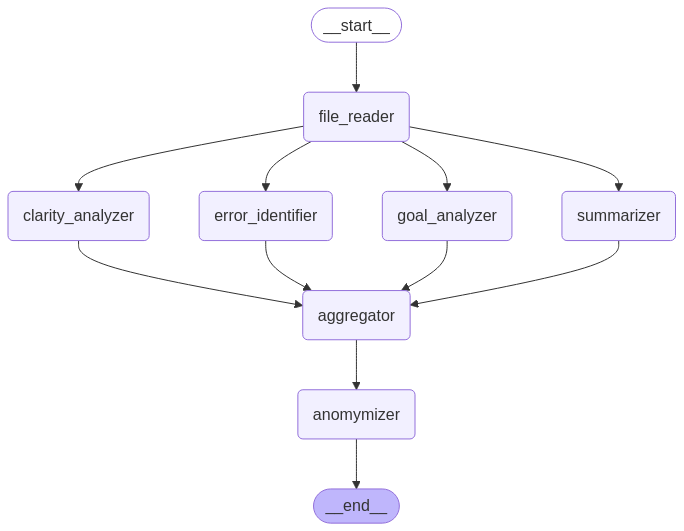

In [5]:
# Show workflow
display(Image(agent_workflow.get_graph().draw_mermaid_png()))

### Test the workflow

In [6]:
# Invoke
USER_REQUEST = "please, could you analyze the provided file doc1.pdf?"

# call must be formatted this way
state = agent_workflow.invoke({"request": USER_REQUEST})

# display the final, aggregated and anonymized, result
display(Markdown((state["final_output"])))

2025-03-02 20:47:21,095 - Calling FileReader
2025-03-02 20:47:21,812 - File name to be analyzed is: doc1.pdf
2025-03-02 20:47:21,813 - Reading file content...
2025-03-02 20:47:22,155 - Calling ErrorIdentifier
2025-03-02 20:47:22,155 - Calling ClarityAnalyzer
2025-03-02 20:47:22,156 - Calling GoalAnalyzer
2025-03-02 20:47:22,156 - Calling Summarizer
2025-03-02 20:47:31,032 - Calling Aggregator
2025-03-02 20:47:31,035 - Calling Anonymizer


## Analysis of the document: doc1.pdf

### Summary:
**Proof of Concept Joint Execution Plan: [Client Name] and Oracle OCI**

**Overview**

This document outlines the joint execution plan for a proof of concept (POC) between [Client Name] and Oracle Cloud Infrastructure (OCI). The goal of the POC is to assess [Client Name]'s environment requirements and deliver a set of architecture recommendations with a roadmap and business case that demonstrates how Oracle Cloud aligns with [Client Name]'s business objectives.

**Scope and Approach**

The scope of the POC includes:

* Creating an OCI account and configuring tenancy
* Setting up a Kubernetes cluster
* Configuring resource manager to use Terraform deployment
* Installing customer stack applications
* Configuring Gen AI and Data Science

The approach involves a 10-week project plan with six phases:

1. Setting up an OCI environment (1 week)
2. Configuring networking, virtual machines, and storage (2 weeks)
3. Configuring monitoring and logging AI services (2 weeks)
4. Configuring Data Science and Gen AI (2 weeks)
5. Installing customer applications and testing (2 weeks)
6. POC conclusion and go-live (1 week)

**Success Criteria**

The success criteria for the POC include:

* Ease of deployment
* Performance
* Ability to use data science services and receive good results from other insurance companies

**Deliverables**

The deliverables for the POC include a production-level working environment that supports product launches using OCI.

**Contacts**

The key contacts for the POC include:

* [Sales Representative's Name] (Cloud Sales Rep, Oracle)
* [Client CTO's Name] (CTO, [Client Name])
* [ACE's Name] (ACE, Oracle)
* [Science Specialist's Name] (Science Specialist, Oracle)

**Timeline**

The POC is scheduled to take place from January 18th, 2024, to April 4th, 2025. The project plan includes a detailed timeline with milestones and deadlines.

Overall, the POC aims to demonstrate the feasibility of migrating [Client Name]'s workload from AWS to OCI and to provide a roadmap for future migration.

### Clarity:
I would evaluate the clarity of the provided text as a 6 out of 10. Here's why:

Strengths:

1. **Clear structure**: The document has a well-defined structure, with a table of contents, introduction, and separate sections for scope, approach, timelines, architecture, and deliverables.
2. **Specific details**: The text provides specific details about the project, such as the client's objectives, the scope of work, and the timeline.
3. **Technical terms**: The document uses technical terms and acronyms (e.g., OCI, IAAS, PaaS, Kubernetes) that are likely familiar to the target audience.

Weaknesses:

1. **Dense and technical language**: The text is dense and technical, which may make it difficult for non-experts to understand.
2. **Lack of concise summaries**: Some sections, such as the "Scope and Approach" section, are lengthy and could benefit from concise summaries or bullet points.
3. **Typos and formatting issues**: There are some typos (e.g., "effeciencies" instead of "efficiencies") and formatting issues (e.g., inconsistent spacing, missing bookmarks).
4. **Redundant information**: Some information, such as the client's objectives, is repeated in different sections.
5. **Lack of visual aids**: The document could benefit from visual aids, such as diagrams or flowcharts, to help illustrate complex concepts and architectures.

To improve clarity, I would suggest:

1. **Simplifying technical language**: Using simpler language or providing explanations for technical terms and acronyms.
2. **Breaking up long sections**: Dividing long sections into shorter, more manageable chunks.
3. **Adding concise summaries**: Providing brief summaries or bullet points to help readers quickly understand the main points.
4. **Correcting typos and formatting issues**: Ensuring that the document is free of errors and formatting issues.
5. **Adding visual aids**: Incorporating diagrams, flowcharts, or other visual aids to help illustrate complex concepts and architectures.

### Goals:
The provided text is a Joint Execution Plan for a Proof of Concept (POC) between Oracle and [Client Name]. The plan outlines the scope, approach, timelines, and deliverables for the POC.

The plan defines clear and measurable goals, including:

1. Migrating [Client Name]'s workload from AWS to Oracle Cloud Infrastructure (OCI)
2. Improving scanning quality and policy ranking tool by at least 10%
3. Demonstrating the ease of deployment and performance of the application in a multi-region/tenant architecture using OCI services
4. Delivering a production-level working environment that supports product launches

The plan also provides specific, measurable, achievable, relevant, and time-bound (SMART) measures, including:

1. Specific: Migrating [Client Name]'s stack of Gen AI capacities and managed services from AWS to OCI
2. Measurable: Improving scanning quality and policy ranking tool by at least 10%
3. Achievable: Creating a list of OCI services that match [Client Name]'s current architecture
4. Time-bound: Completing the POC within 10 weeks

Based on the provided text, I would score the plan an 8 out of 10 in terms of defining clear and measurable goals. The plan provides a clear outline of the objectives, scope, and timelines, and includes specific metrics for measuring success. However, some areas, such as the definition of "improving scanning quality" and "better policy ranking tool," could be more specific and quantifiable.

Strengths:

* Clear outline of objectives and scope
* Specific timelines and milestones
* Measurable goals and metrics

Weaknesses:

* Some goals could be more specific and quantifiable
* Limited detail on the methodology and approach for achieving the goals
* No clear definition of the resources and budget required for the POC

Overall, the plan provides a good foundation for the POC, but could benefit from more detail and specificity in certain areas.

### Spelling errors:
Here are the top 10 spelling errors found in the text:

1. "effeciencies" (should be "efficiencies") - found on page 3
2. "scannig" (should be "scanning") - found on page 4
3. "repo" (should be "repository") - found on page 5 (although "repo" is a common abbreviation, it's not the correct spelling in this context)
4. "ballancers" (should be "load balancers") - found on page 5
5. "Debriefing" (should be "debriefing") - found on page 6 (although "Debriefing" is not necessarily an error, it's more common to use lowercase "d")
6. "timespan" (should be "time span") - found on page 7
7. "sub POC" (should be "sub-POC") - found on page 7
8. "Specalist" (should be "Specialist") - found on page 8
9. "4st" (should be "4th") - found on page 5
10. "assaf" (should be "[Science Specialist's Name]") - found on page 8 

Note: I replaced the names with placeholders to maintain anonymity. I did not replace the document name as per your request.